<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculus is all about derivatives and integrals.  Derivatives were covered last time, and now it is time for integrals.  The integral of a function from 1 value to another represents the area between the curve and the x axis within those 2 x values.

The big problem is that it's not always easy to make an area formula for any random shape.  It is however, very easy to find the area of a rectangle, it's simply base times height.  So what we do is divide the area into rectangles.  If you want the integral of f(x) from a to b, then you divide the x axis into a numerical grid of n+1 points, resulting in n regions from a to b.  The distance between each one is h = (b-a)/n.  This is called the subinterval, and will be the base for every rectangle.  What about the height?  Well that depends on how you define the rectangle.

The simplest method is to choose the value at the left or right endpoint.  You can perform this for each rectangle, and then add all the areas together for the total area of the region.  This results in what's known as the Riemann integral.  This ultimately results in an error on the order of O(h), so the smaller your h is, the smaller the error will be.

Another method is to use trapezoids instead of rectangles.  This way, the shape's height will match the function at both endpoints, not just one.  The area of a trapezoid is the same as a rectangle, but you take the average of the 2 lengths on each end.  When you take the area of all trapezoids and add them together, all points except for the 2 ends are double counted, so it's actually not all that different than the other 2 methods, and is actually the average of the 2 methods (left endpoint and right endpoint).  The left endpoint method overestimates area when slope is negative and underestimates when slope is positive.  The right endpoint method is vice versa.

In [69]:
import numpy as np

# create 24 evenly spaced points from 0 to 5.  This means 23 regions
x = np.linspace(0, 5, 24)
# y values for each point
y = x**2

# step size
h = (5 - 0) / 23

# we will find area with 3 methods, right endpoint, left endpoint, and trapezoid
Larea = 0
Rarea = 0
Marea = 0

# For each region, add the area of the shape
# Left endpoint method uses left endpoint as height
# Right uses right
# trapezoid uses average between them as height
for i in range(23):
  Larea += h*y[i]
  Rarea += h*y[i+1]
  Marea += 0.5*h*y[i] + 0.5*h*y[i+1]

# We can see how since slope is positive, left endpoint method underestimates
# and right endpoint method overestimates.  Even the trapezoid method
# slightly overestimates because the curve is nt straight.
# the real answer is found with calculus, where the integral is 1/3 x^3
print("left endpoint method")
print(Larea)
print("right endpoint method")
print(Rarea)
print("trapezoid method")
print(Marea)
print("exact answer")
print(125/3)


left endpoint method
38.98865784499055
right endpoint method
44.4234404536862
trapezoid method
41.70604914933837
exact answer
41.666666666666664


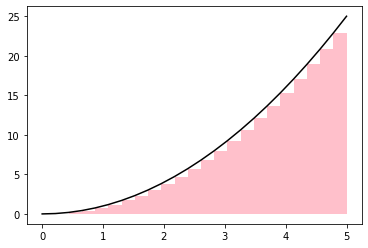

In [82]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 24)
y = x**2

x2 = np.delete(x, 0)
x2 = np.append(x2, x2[-1])

rx = np.empty(48)
ry = np.empty(48)

for i in range(24):
  rx[2*i] = x[i]
  rx[2*i+1] = x2[i]
  ry[2*i] = y[i]
  ry[2*i+1] = y[i]

#We can see how left endpoint method underestimates
plt.plot(x,y, 'k')
plt.fill_between(rx, ry, facecolor = 'pink')

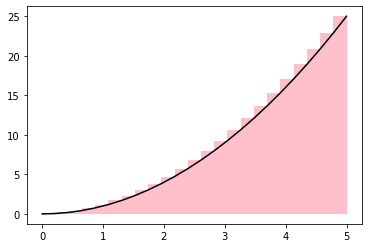

In [83]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 24)
y = x**2

x2 = np.delete(x, -1)
x2 = np.insert(x2, 0, x2[0])

rx = np.empty(48)
ry = np.empty(48)

for i in range(24):
  rx[2*i+1] = x[i]
  rx[2*i] = x2[i]
  ry[2*i] = y[i]
  ry[2*i+1] = y[i]


#We can see how right endpoint method overestimates
plt.plot(x,y, 'k')
plt.fill_between(rx, ry, facecolor = 'pink')

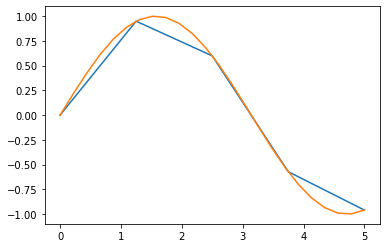

In [88]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 5)
x2 = np.linspace(0, 5, 24)

y = np.sin(x)
y2 = np.sin(x2)

# We can see that with more complicated functions like sine,
# even the trapezoid method can be off by quite a bit
plt.plot(x,y)
plt.plot(x2,y2)